<a href="https://colab.research.google.com/github/penelopetir/24SBIOL74.03PT/blob/main/Exercise_3_Membrane_Voltage_Ionic_Currents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL 74.03 (SP23): Computational Modeling of the Nervous System
## Exercise 3: Calculating membrane voltage and ionic currents in cells

### Exercise goals

1) Calculate resistances and capacitances within cellular geometries.

2) Get comfortable writing code implementing mathematical equations and handling units

3) Use the Nernst equation to calculate ionic reversal potentials

4) Use the Goldman equation to calcualte resting membrane potentials

5) Analyze a simple RC circuit, a building block on the way to our first neuron model

Work through the code below, running each cell, adding code where required, and making sure you understand the output. When you see questions with ***Q:*** preceding them, write your responses in text cells.

In [ ]:
!git clone https://github.com/CompModNervSystem/CompModNervSys-NernstVm.git # downloads repository into our Google colab session's file system

Cloning into 'CompModNervSys-NernstVm'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 22 (delta 5), reused 22 (delta 5), pack-reused 0
Receiving objects: 100% (22/22), 149.88 KiB | 2.42 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Membrane resistance and capacitance

Suppose we have a spherical cell with diameter $d$ and a membrane with thickness $t$. Recall that resistance $R$ is given by $R = \rho L/A$, where $\rho$ is the resistivity of the medium, $L$ is the length over which current travels, and $A$ is the cross-sectional area. Write a function that computes the membrane resistance given a membrane resistivity $\rho_{m}$, which has units $\Omega \cdot cm$. Use this function to compute the membrane resistance of a cell in units of $M\Omega$ with a $10 \; \mu m$ diameter, membrane thickness of $3 \; nm$ (this refers to the insulating part of the lipid bilayer), and resistivity of $5 \; G \Omega cm$ ($1\cdot10^{9} \Omega cm$) and print the output.

For a refresher on converting between metric units, see the chart below:

<img src="https://raw.githubusercontent.com/CompModNervSystem/CompModNervSys-NernstVm/main/resources/metric-prefix-scale.jpeg" alt="Metric Prefix scale" width="643" height ="288">

In [2]:
import numpy as np

def calcRsphericalCell(rho_m,d,t):
    #R = rho_m*length/cross_section
    r = d/2
    A = 4*np.pi*(r**2) #surface area of a sphere
    return rho_m*t/A #this gives in Ohms

rho_m = 5e9 # resistivity - Ohm*cm
d = 10e-4 # diameter - cm
t = 3e-7 # thickness - cm

R = calcRsphericalCell(rho_m,d,t)
print('Resistance = {:.1f} MOhms'.format(R/1e6)) #to convert to MOhm

Resistance = 477.5 MOhms


<font color='red'> <b><i>Q1:</b></i> How would you convert this to the membrane's conductance?

</font>

I would convert this to conductance by taking the reciprocal; conductance and resistance are inverse.

In [5]:
print(f"The conductance is: {1/R} S")

The conductance is: 2.094395102393195e-09S


Now, write a similar function to calculate the membrane's capacitance. Recall the equation for capacitance of parallel plates is $C = \epsilon A/L$, where $\epsilon$ is the dielectric constant of the medium's between the plates, $A$ is the surface area, and $L$ is the distance between the plates. Use this function to compute the membrane capacitance of the same cell in units of $pF$ with $\epsilon = 0.3 pF/cm$ and print the output.

In [6]:
def calcCsphericalCell(eps_m,d,t):
    A = 4*np.pi*((d/2)**2)#surface area of a sphere
    return eps_m*A/t #This gives in farads

eps_m = 0.3e-12 # dielectric constant - F/cm
d = 10e-4 # diameter - cm
t = 3e-7 # thickness - cm

C = calcCsphericalCell(eps_m,d,t)
print('Capacitance = {:.3f} pF'.format(C*1e12)) #want in pF, so multiply by 1e12

Capacitance = 3.142 pF


Since the membrane thickness is essentially constant across all excitable cells, it's often easier to refer to the *specific membrane resistance*, $R_{m}$, which is the resistance per unit area, and the *specific membrane capacitance*, $C_{m}$, which is the capacitance per unit area. $R_{m}$ is just the numerator of our resistance equation, so $\rho_{m}t$, and $C_{m}$ is obtained by combining the $\epsilon/t$ terms from the capacitance equation.

<font color='red'><b><i>Q2:</b></i> What values of $R_{m}$, in units of $\Omega cm^{2}$, and $C_{m}$, in units of $\mu F/cm^{2}$, do we get using the values given above? How does the cell's total membrane resistance $R$ and capacitance $C$ scale with the diameter and surface area of the cell?
These are the quantities you're more likely to see reported in experimental and modeling literature and that we'll be using in our models.

</font>

In [7]:
rho_m = 5e9 # resistivity - Ohm*cm
eps_m = 0.3e-12 # dielectric constant - F/cm
t = 3e-7 # thickness - cm

Rm = rho_m*t
Cm = (eps_m*1e6)/t #farads to micro-farads
print(f"Specific Resistance: {Rm} Ohms/cm^2\nSpecific Capacitance: {Cm} uF/cm^2")

Specific Resistance: 1500.0 Ohms/cm^2
Specific Capacitance: 1.0 uF/cm^2


If this is a typical for the thickness of the cell membrane, then the specific resistance will be on the order of hundreds to thousands Ohms/cm^2 and capacitance will be in the 0-10 uF/cm^2 range (in terms of magnitudes it should be around here)

Now, write new functions calculating the membrane resistance and capacitance, based on your functions above that instead take as input $R_{m}$ and $C_{m}$. Check that you get the same output as above. Be careful about units!

In [8]:
# your new functions go here
def calcRsphericalCell(R_m,d):
    A = 4*np.pi*((d/2)**2)#surface area of a sphere
    return R_m/A #this gives in Ohms

def calcCsphericalCell(C_m,d):
    A = 4*np.pi*((d/2)**2)#surface area of a sphere
    return (C_m/1e6)*A #returns in F

In [9]:
# Call your functions and return R and C here
rho_m = 5e9 # resistivity - Ohm*cm
eps_m = 0.3e-12 # dielectric constant - F/cm
d = 10e-4 # diameter - cm

Rm = rho_m*t #ohm*cm^2
Cm = (eps_m*1e6)/t #micro-farads/cm^2

R = calcRsphericalCell(Rm,d)
C = calcCsphericalCell(Cm,d)
print('Resistance = {:.1f} MOhms'.format(R/1e6))
print('Capacitance = {:.3f} pF'.format(C*1e12))

Resistance = 477.5 MOhms
Capacitance = 3.142 pF


# Calculating the Nernst potential

Now let's calculate the Nernst equilibrium potential for some typical ion concentrations in mammalian neurons. Recall the Nernst equation is:

$V_{m}^{eq} = RT/ZF \ln([C]_e/[C]_i)$

Where $R$ is the gas constant, $8.314 J/K \cdot mole$, $T$ is temperature in $K$ (Kelvin), $Z$ is the ion's valence (don't forget the sign!), and $F$ is Faraday's constant, $96,485.3 C/mole$. $[C]_e$ and $[C]_i$ are the extracellular and intracellular concentrations.


<font color='red'><b><i>Q3</b></i>: Do the units matter for concentration in this equation?

</font>

The units do not matter in this equation, as long as they are the same for each concentration. This is because a ratio is being taken, and then the log of that. The ratio causes the units to cancel out, and taking the log doesn't change units, so that portion is unitless.

| Ion            | Intracellular [mM] | Extracellular [mM] |
| -------------- | ------------------ | ------------------ |
| Potassium (K+) | 140 | 5 |
| Sodium (Na+) | 15 | 145 |
| Chloride (Cl-) | 5 | 110 |


Write a single function that outputs the Nernst potential for a given ion. Then, using your function and the concentrations above, print the Nernst potentials (in $mV$) for potassium, sodium, and chloride for a neuron at body temperature ($37^{\circ} C$). Just use 1 decimal place for outputting these values.

In [10]:
def calcNernstIon(Z, C_e, C_i):
    R = 8.314 #J/K*mol
    T = 273 + 37 #K, body temp is 37C
    F = 96485.3 #C/mol
    return 1000*R*T*np.log(C_e/C_i)/(Z*F) #mV

Ek = calcNernstIon(1, 5, 140)
Ena = calcNernstIon(1, 145, 15)
Ecl = calcNernstIon(-1, 110, 5)
print('Ek = {:.1f} mV, Ena = {:.1f} mV, Ecl = {:.1f} mV'.format(Ek,Ena,Ecl))

Ek = -89.0 mV, Ena = 60.6 mV, Ecl = -82.6 mV


This gives us the reversal potential for individual ions, but we know from the Goldman equation that the actual rest potential is a function of the ion concentrations *and* their permeabilities in the membrane. The Goldman equation is given by:

$V_{m}^{eq} = \frac{RT}{F}\ln \left( \frac{P_{K}[K]e + P_{Na}[Na]e + P_{Cl}[Cl]i}{P_{K}[K]i + P_{Na}[Na]i + P_{Cl}[Cl]e} \right)$

Write a function that uses the Goldman equation to compute the resting potential given a set of K, Na, and Cl- permeabilities and concentrations. Use it to calculate the resting potential given relative resting permeabilities $P_{K}:P_{Na}:P_{Cl}$ of $1:0.05:0.45$ at body temperature and print the output in $mV$.

In [11]:
def calcVmGoldman(P,C_e,C_i,Z):
  #constants
  R = 8.314 #J/K*mol
  T = 273 + 37 #K, body temp is 37C
  F = 96485.3 #C/mol

  #initialize
  num = 0
  den = 0

  #for-loop not as efficient but Goldman eqn probably doesn't have that many ions
  for i in range(len(C_e)):
    if Z[i] > 0: #positive ion
      num += P[i]*C_e[i]
      den += P[i]*C_i[i]
    else: #negative ion
      num += P[i]*C_i[i]
      den += P[i]*C_e[i]

  return 1000*R*T*np.log(num/den)/F #returns resting potential in millivolts

P = [1,0.05,0.45]
C_e = [5,145,110]
C_i = [140,15,5]
Z = [1,1,-1]
Vm = calcVmGoldman(P,C_e,C_i, Z)

print('Resting Vm = {:.1f} mV'.format(Vm))

Resting Vm = -68.8 mV


Now, suppose we were doing an experiment where we had some neurons in a dish and can control the concentration of ions in the extracellular solution. When mimicking the normal extracellular environment of neurons, this solution is sometimes called artificial cerebrospinal fluid (aCSF). It also includes other important things like buffers and energy sources (glucose) so our neurons are happy outside of the brain where they usually belong, but for our purposes, the ions are what matters.

We want to see how resting membrane potential varies with extracellular potassium concentration, which we control in the aCSF. We can measure the intracellular voltage of the cell with a special electrode made out of a glass micropipette pulled to a fine tip less than 1 $\mu m$ in diameter containing an electrolyte solution mimicking the cytosol and a wire that connects to a fancy voltmeter that amplifies small voltage or current signals. We'll talk more about this technique, called patch clamp electrophysiology, in class.

Assuming your function worked, you can tell that the resting membrane potential is closest to the Nernst potential for potassium ($E_{k}$). If we did an experiment varying the extracellular potassium concentration and measuring resting membrane potential, what would we see? Use `matplotlib` (or your preferred plotting package) to plot the resting membrane potential vs. extracellular potassium concentration. Assume all the other intracellular and extracellular concentrations are the same as before and we heated up our neurons to body temperature. Use a log-scale on the x-axis. (Hint: your output should look like Figure 2.7 from Ch.2 of Purves, Neuroscience, the assigned reading).

(-80.0, 10.0)

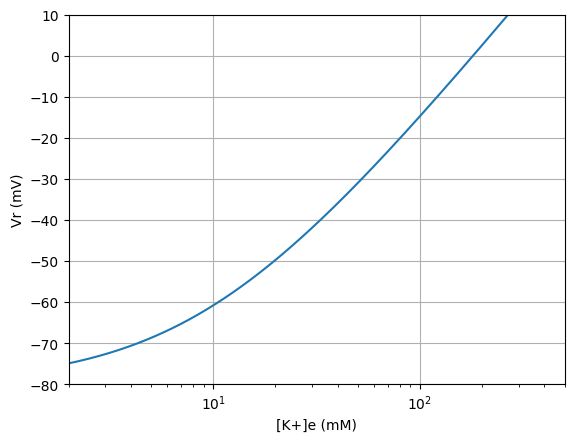

In [12]:
import matplotlib.pyplot as plt

P = [1,0.05,0.45]
C_i = [140,15,5]
Z = [1,1,-1]
Ce_k_vec = np.logspace(0,3,1000) # vector of concentrations in mM
Vm_vec = [calcVmGoldman(P,[K_pot,145,110],C_i, Z) for K_pot in Ce_k_vec] # vector of resting membrane potentials (mV)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Ce_k_vec,Vm_vec)
#
ax.grid(visible=True)
ax.set_xscale('log')
ax.set_xlabel('[K+]e (mM)')
ax.set_ylabel('Vr (mV)')
ax.set_xlim([2, 500])
ax.set_ylim([-80,10])

Let's say we wanted to do an experiment where we raised the resting membrane potential by $10 mV$ from the value you calculated earlier. What concentration of K+ should we use in the extracellular solution?

You could do some math to work this out, or if you're lazy (like me), write some code to work it out for you. One way would be to just plug in a vector of finely sampled $[K+]_{e}$ (guesses) to the Goldman equation function you wrote and extract the resting membrane potential closest to our desired potential. Write a function below that does this using either this method or a method of your choosing. If you get stuck here, you can just use the "guess and check" method with your function and move on.


In [13]:
#can't be sure we'll have calculated exactly 10mV less
#subtract and find the value closest to zero
#in case positive and negative, take the absolute value
r_new = Vm + 10
index = np.abs(Vm_vec - r_new).argmin()
print(f"The new extracellular potassium concentration should be {Ce_k_vec[index]:.2f} mM")
print(f"New Potential: {Vm_vec[index]:.2f} mV")

The new extracellular potassium concentration should be 11.56 mM
New Potential: -58.79 mV


# First look at the RC circuit model

Let's start playing with the most basic circuit model of a cell membrane, an RC circuit, shown below. In this case, we're modeling the membrane conductance as *passive*, i.e., ignoring the presence of nonlinear voltage gated ion channels. This turns out to be a decent model of neuronal membranes at voltages near equilibrium, since the nonlinear currents are still small. The circuit is composed of the membrane capacitance $C_{m}$ in parallel with a resistor $R$ representing an ionic conductance ($g=1/R$) with a reversal potential $E_{rev}$. This is sometimes referred to as the *leak* conductance and is simply the total conductance of the membrane's ion channels at rest lumped together and treated as passive (non-voltage dependent). Since we only have a single leak conductance, this is equivalent to the membrane resistance, $R_{m}$, which we'll use in the model equations below.


<img src="https://raw.githubusercontent.com/CompModNervSystem/CompModNervSys-NernstVm/main/resources/RC_circuit.png" alt="RC circuit schematic" width="381" height ="254">

There's only one path for current to flow, so we know the capacitive current is always equal and opposite to the ionic current:

$I_{C}(t) = -I_{ion}(t)$.

Recall, the equation for current in a capacitor is $I_{C} = CdV/dt$ and the equation for current through an ion channel with a reversal potential is just the modified version of Ohm's law we introduced in class, $I_{ion} = (1/R)(V_{m} - E_{rev})$. Putting these together we have:

$C_{m}\frac{dV_{m}(t)}{dt} = -(V_{m}(t) - E_{rev})/R_{m}$.

This is just a first order ordinary differential equation, which you may have seen before. I won't go through the derivation here, but here's the solution for $V_{m}$:

$V_{m}(t) = (V_{0}-E_{rev})e^{-t/R_{m}C_{m}} + E_{rev}$,

where $V_{0}$ is $V_{m}$ at $t=0$.

<font color='red'><b><i>Q4:</b></i> First, what is $V_{m}$ at equilibrium ($t \rightarrow \infty$) and why?

</font>

as t goes to infinity, the term (Vo-Erev)exp(-t/RmCm) goes to zero because the exponent goes to infinity and it is a negative exponent. Thus, as t goes to infinity, Vm(t) tends towards equaling Erev, the nernst potential. This makes sense, as the concentrations on either end of the membrane do not change much.

Now, let's use this model to simulate a simplified version of the experiment we conducted above where we wanted to increase the resting membrane potential by $10 mV$. Imagine we started with a reversal potential, in this case of our nonspecific leak conductance $E_{rev}$, of $-70 mV$, and we had a way of instantaneously changing the ion concentrations in the bath to generate our new reversal potential, $-60 mV$.

Use the equation above and `numpy`/`matplotlib` to plot the voltage in $mV$ vs. time in $ms$. Use the $R$ and $C$ values we calculated at the beginning for a spherical cell for $R_{m}$ and $C_{m}$. Be careful about units!

Tau: 0.0015


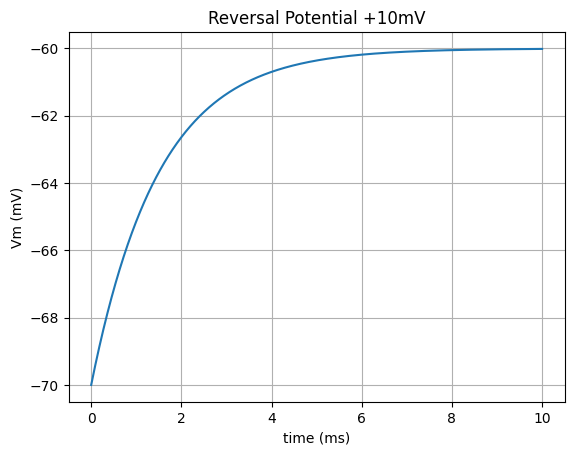

In [24]:
t = np.linspace(0,0.01,1000) # time in seconds
E_rev = -60*np.ones(t.shape) #mV
Vo = -70
tau = R*C
Vm = ((Vo-E_rev)*np.exp(-t/tau))+E_rev

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e3,Vm)
ax.set_xlabel('time (ms)')
ax.set_ylabel('Vm (mV)')
ax.grid(visible=True)
ax.set_title("Reversal Potential +10mV")
print("Tau: {}".format(tau))

As you may know from a differential equations course, the product $RC$ in this equation is also known as the time constant $\tau$. In our case, this is known as the *membrane time constant* and is given the special symbol $\tau_{m}$. It has units of time ($\Omega \cdot F = sec$, or $k\Omega \cdot \mu F = ms$). From inspecting the equation or your plot, you can see it's the time at which the voltage reaches 63.2% ($1-1/e$) of it's steady state value (or increases by 36.8%). In general, the time constant is a measure of how fast the membrane voltage can change in response to a stimulus (shorter times being faster). In our artificial situation, this was an instant change in bath concentrations, but later, this will be currents generated by synaptic inputs or electrical stimulation we apply.

Below, try overlaying plots of the same manipulation if the time constant was doubled or halved.

At time = 500ms, the reversal potential changes to equal -60mV



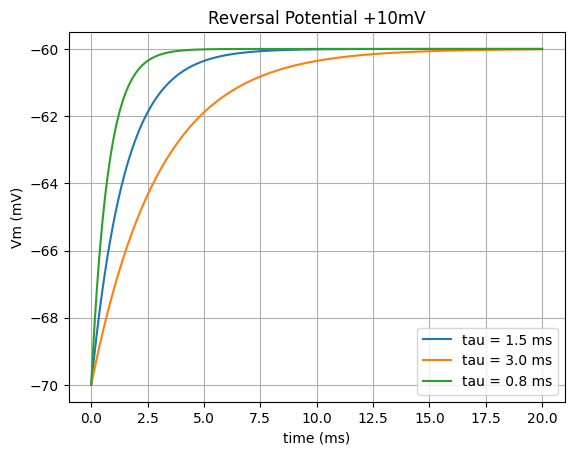

In [22]:
# Your code goes here
t = np.linspace(0,0.02,1000) # time in seconds
E_rev = -60*np.ones(t.shape) #mV
tau1 = tau
tau2 = tau*2
tau3 = tau*0.5
Vm1 = (Vo-E_rev)*np.exp(-t/tau1)+E_rev
Vm2 = (Vo-E_rev)*np.exp(-t/tau2)+E_rev
Vm3 = (Vo-E_rev)*np.exp(-t/tau3)+E_rev

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e3,Vm1,label='tau = {:.1f} ms'.format(tau1*1e3))
ax.plot(t*1e3,Vm2,label='tau = {:.1f} ms'.format(tau2*1e3))
ax.plot(t*1e3,Vm3,label='tau = {:.1f} ms'.format(tau3*1e3))
ax.set_xlabel('time (ms)')
ax.set_ylabel('Vm (mV)')
ax.grid(visible=True)
ax.legend()
ax.set_title("Reversal Potential +10mV")
print("At time = 500ms, the reversal potential changes to equal -60mV\n")

<font color='red'><b><i>Q5:</b></i> What physical variable could actually be changing to mediate this change in membrane time constant?

</font>

Tau is determined by the membrane resistivity and capacitance, which are dependent on the rho and epsilon values in addition to the thickness of the membrane and the diameter of the cell. Thus, the variables that could be changing are the diameter of the cell or the thickness of the membrane, since rho and epsilon are both constants.

Let's also take a look at the capacitive and ionic currents underlying the changes in $V_{m}$ for the first case we simulated. Plot the capacitive and ionic current as current densities in units of $pA/\mu m2$ by dividing each current by the total membrane surface area ($A = 4\pi(d/2)^2$, still using $d = 10 \; \mu m$).

Since the capacitive current is given by $C_{m} dV_{m}/dt$, you could calculate the capacitive current numerically by taking the numerical *difference* of the voltage traces, but in this case, we can calculate the capacitive current analytically:

$I_{C}(t) = C_{m}dV_{m}/dt = C_{m}\frac{d}{dt}\left((V_{0}-E_{rev})\exp^{-t/R_{m}C_{m}} + E_{rev}\right)$

$I_{C}(t) = -\frac{V_{0} - E_{rev}}{R_{m}}\exp^{-t/R_{m}C_{m}}$

Text(0.5, 1.0, 'Ionic and Capacitive Potentials in 10mV Change')

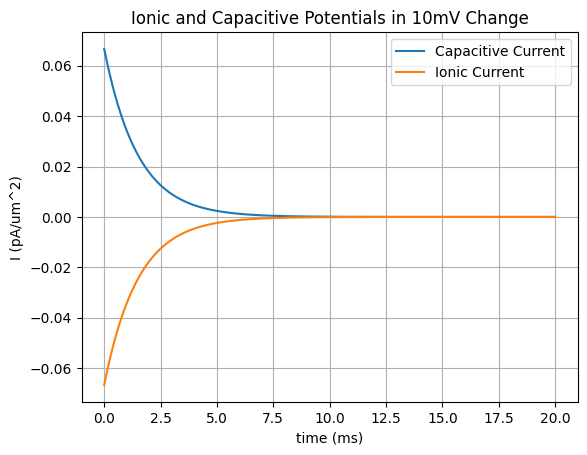

In [23]:
# Your code goes here
V_diff = (Vo-E_rev)*1e-3 #to make units in V (from mV)
Ic = -((V_diff)/R)*np.exp(-t/tau) #units would be in A
d = 10*1e-6 #meters
A = 4*np.pi*((d/2)**2) #surface area of a sphere, in m^2
Ic_density = Ic/A #Amps per m^2 is same as pA/um^2

#capacitive and ionic currents are the same, just opposite sign
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e3,Ic_density,label='Capacitive Current')
ax.plot(t*1e3,-Ic_density,label='Ionic Current')
ax.set_xlabel('time (ms)')
ax.set_ylabel('I (pA/um^2)')
ax.grid(visible=True)
ax.legend()
ax.set_title("Ionic and Capacitive Potentials in 10mV Change")



Finally, let's test a pretty major assumption we made when deciding to represent the Nernst potential as a fixed voltage source (battery). I mentioned in lecture that the ionic fluxes required to reach equilibrium, and more generally, that occur in the normal course of neural signaling don't significantly affect the bulk concentration of ions in the cell. Suppose we accomplished the $10 mV$ change by increasing the extracellular potassium concentration.

<font color='red'><b><i>Q6:</b></i> First, in your own words, explain the sequence of events leading from the initial condition ($V_{m} = -70 mV$) to the final steady state condition ($V_{m} = -60 mV$).

</font>

We start at the resting potential at -70mV which is determined by the concentrations of the ions. The reason that there is a voltage potential is because there are pumps and exchangers causing there to be gradients so that there is a difference in charge intracellularly and extracellularly. When we change the extracellular concentration of potassium, we create a charge imbalance, which the cell tries to remediate by allowing potassium to flow into the cell. Since we now have movement of ions and a difference in the concentrations, a new potential is reached. The flux of ions cannot happen all at once, and thus as we can see based on the time constant that there is a new resting potential being reached.


The excess charge from the movement of positive ions (let's use K+ for simplicity) is $Q=\Delta V_{m}C_{m}$. We can convert this from electrical charge in Coulombs to the amount of ion particles in moles $N$ using Faraday's constant, $N = Q/F$. Fill in the empty portions of the calculations below.

In [ ]:
deltaVm = 0.01 # V - change in membrane voltage
Q = deltaVm*C # C - charge built up on membrane
F = 96485.3 # C/mol - faraday's constant
N = Q/F # number of charges moved
d = 10e-6 # m

Vol = (4/3)*np.pi*(d/2)**3 # m^3
Vol = Vol*1e3 # convert to L (1000 L per cubic meter)
Cki = 140e-3 # M - mols/liter - initial concentration
Ntot = Cki*Vol # mols K - initial
Cki2 = (Ntot+N)/Vol # M - mols/liter - final concentration

print('The intracellular concentration changed from {} mM to {} mM, {:f}% change'.format(Cki*1e3,Cki2*1e3,100*(Cki2-Cki)/Cki))


The intracellular concentration changed from 140.0 mM to 140.00062185638643 mM, 0.000444% change


<font color='red'><b><i>Q7:</b></i>
Is our assumption that ionic concentrations aren't affected by the ionic currents okay and why? Under what conditions is it a better or worse assumption,
or in other words, can you think of scenarios where it would be more or less safe?

</font>

According to these calculations, the currents are so small that there isn't much change in voltage. This makes sense; we calculated earlier that there are really tiny currents that still show a decent change in voltage.

It seems to be a good assumption for these smaller changes in voltage (subthreshold changes), as there isn't a substantial amount of current. Looking ahead, I know that action potentials create really sharp voltage differences, and it is that initial voltage difference as seen in the graphs above (I made the voltage change to be slightly after t = 0 so that I could see the effects there) where the current peaks as well. Maybe then the current will be more significant and cause concentration changes.

Another scenario where this could change is if we had smaller cells. I'm not sure physiologically if there is support for this, but the larger the cell is the more resistant I would think that it is to change its concentration based on ion flow. This is because it would need more ions to change the concentration because there is more volume. We might work with comparatively large cells, so it would be safe to assume that the concentration does not change much.